In [58]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.special import zeta


In [3]:
%matplotlib inline
import glob
import os
import random
from tqdm import tqdm
import scipy as cv
import PIL
from PIL import Image
!pip install plotly
import plotly.express as px
from IPython import display

import tensorflow as tf
from tensorflow import keras



In [7]:
import torch
#from torchvision import datasets
#from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [8]:
df = pd.read_csv('nft_sales.csv')
df.head()

,Collections,Sales,Buyers,Txns,Owners
0,Axie Infinity,"$3,328,148,500","10,79,811","97,55,511","26,56,431"
1,CryptoPunks,"$1,664,246,968","4,723","18,961","3,289"
2,Art Blocks,"$1,075,223,906","20,934","1,17,602","25,094"
3,Bored Ape Yacht Club,"$783,882,186","8,284","22,584","5,862"
4,NBA Top Shot,"$781,965,423","3,74,818","1,17,90,699","6,03,928"


In [ ]:
df.describe()

# Cleaning the Dataset

In [9]:
df.rename(columns = {'Sales':'Sales in USD','Txns':'Transactions'}, inplace = True)
df['Sales in USD'] = df['Sales in USD'].str.replace(',', '')
df['Sales in USD'] = df['Sales in USD'].str.replace('$', '')
df['Buyers'] = df['Buyers'].str.replace(',','')
df['Transactions'] = df['Transactions'].str.replace(',','')
df['Owners'] = df['Owners'].str.replace(',','')
df=df.dropna()
df

<ipython-input-9-79b1fab40638>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Sales in USD'] = df['Sales in USD'].str.replace('$', '')


,Collections,Sales in USD,Buyers,Transactions,Owners
0,Axie Infinity,3328148500,1079811,9755511,2656431
1,CryptoPunks,1664246968,4723,18961,3289
2,Art Blocks,1075223906,20934,117602,25094
3,Bored Ape Yacht Club,783882186,8284,22584,5862
4,NBA Top Shot,781965423,374818,11790699,603928
...,...,...,...,...,...
245,Evolution,2536468,746,4961,2061
246,LegionPunks,2535490,1702,3794,2410
247,BabyApes,2521714,1671,3405,2785
248,Train of the Century,2504080,3139,39460,3160


# Converting Strings into INT

In [10]:
df['Sales in USD'] = df['Sales in USD'].astype('int64')
df['Buyers'] = df['Buyers'].astype('int64')
df['Transactions'] = df['Transactions'].astype('int64')
df['Owners'] = df['Owners'].astype('int32')

In [11]:
df['100 million club'] = np.where(df['Sales in USD']>=100000000, 'Yes', 'No')

In [12]:
# Sales of NFT's which are under 'Punks Collection'
punks_collection = df[df['Collections'].str.contains('Punks')]

sum_sales = punks_collection['Sales in USD'].sum()
print(f"Total Sales of 'Punks' Collection is {sum_sales:,}$")
punks_collection

Total Sales of 'Punks' Collection is 1,764,170,511$


,Collections,Sales in USD,Buyers,Transactions,Owners,100 million club
1,CryptoPunks,1664246968,4723,18961,3289,Yes
66,SolPunks,32952969,5926,14399,4414,No
86,Bastard Gan Punks V2,20062405,3246,10387,2893,No
88,Space Punks Club,19780599,5556,12197,4557,No
90,DystoPunks V2,19165801,1207,2876,672,No
173,COVIDPunks,5426279,4338,9981,3841,No
246,LegionPunks,2535490,1702,3794,2410,No


# Graph for the Owners in Punks Collection

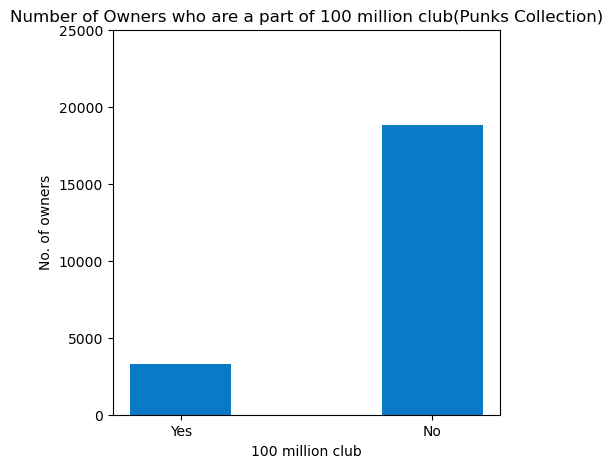

In [13]:
df2 = punks_collection.groupby('100 million club').sum()
owners = [df2['Owners'][1],df2['Owners'][0]]
con = ['Yes','No']
plt.style.use('default')
plt.figure(figsize=(5,5))
p = plt.bar(con,owners,width=0.40,color='#0B7AC6')
plt.ylim(0,25000)
plt.title("Number of Owners who are a part of 100 million club(Punks Collection)")
#plt.bar_label(p)
plt.xlabel('100 million club')
plt.ylabel('No. of owners')
plt.show()

# Sales of all other Punks Collection

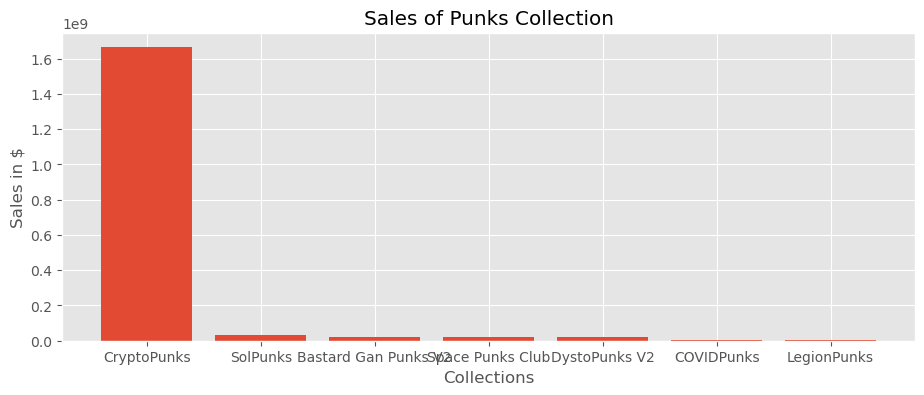

In [14]:
collection = punks_collection['Collections']
sales = punks_collection['Sales in USD']
plt.style.use('ggplot')
plt.figure(figsize=(11,4))
plt.bar(collection,sales)
plt.title('Sales of Punks Collection')
plt.xlabel('Collections')
plt.ylabel('Sales in $')
plt.show()

# Average Sales of 100 million Club

In [15]:
df_100 = df.loc[df['100 million club'] == 'Yes']
average_sales_100 =round(df_100['Sales in USD'].mean())
df_no100 = df.loc[df['100 million club'] == 'No']
average_sales_no100 = round(df_no100['Sales in USD'].mean())
print(f'Average sales of 100 million club is {average_sales_100:,}$')

Average sales of 100 million club is 457,926,711$


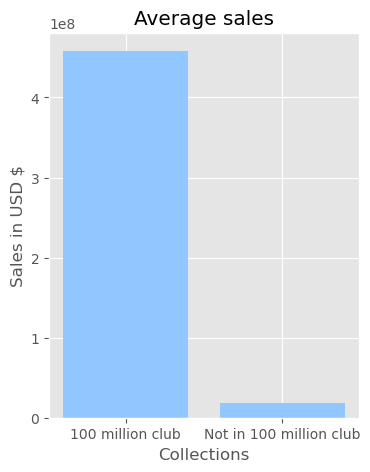

In [16]:
x= ['100 million club','Not in 100 million club']
avg = [average_sales_100,average_sales_no100]

plt.style.use('seaborn-pastel')
plt.figure(figsize=(4,5))

plt.bar(x,avg)
plt.title('Average sales')
plt.xlabel('Collections')
plt.ylabel('Sales in USD $')
plt.show()

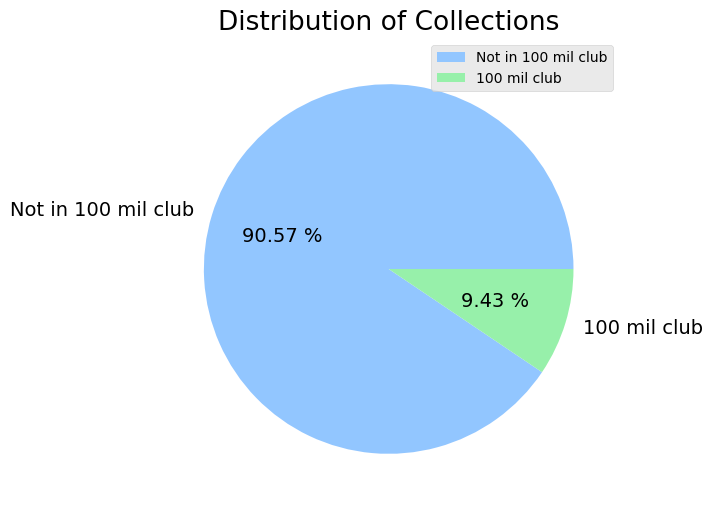

In [18]:
count = df.groupby(['100 million club']).count()['Collections']
labels = ["Not in 100 mil club","100 mil club"]
plt.style.use('seaborn-pastel')
plt.figure(figsize=(6,6))
plt.pie(count,labels=labels,autopct='%.2f %%',textprops={'fontsize': 14})
plt.title("Distribution of Collections",fontdict={'fontsize': 19})
plt.legend(fontsize=10)
plt.show()

# Maximum Sales 

In [19]:
maximum_sale = df['Sales in USD'].max()
collection = df[df['Sales in USD'] == maximum_sale ]['Collections'][0]

print(f'The NFT Collection having maxiumum sales is {collection}')
print(f'Total sales of {collection} are {maximum_sale:,} USD')

The NFT Collection having maxiumum sales is Axie Infinity
Total sales of Axie Infinity are 3,328,148,500 USD


# More Number of Transcations leads to More Sales ?

In [22]:
most_transaction  = df['Transactions'].max()
most_data = df[df['Transactions']==most_transaction]
collection_of_most = most_data['Collections'].iloc[0]
sales_of_most = most_data['Sales in USD'].iloc[0]

lower_transact = df.iloc[1][3]
collection_of_lower = df.iloc[1][0]
sales_of_lower = df.iloc[1][1]

print(f'{collection_of_most} has {most_transaction} transactions (Highest amongst all)')
print(f'{collection_of_lower} has {lower_transact} transactions (Relatively lower transaction)')

NBA Top Shot has 11790699 transactions (Highest amongst all)
CryptoPunks has 18961 transactions (Relatively lower transaction)


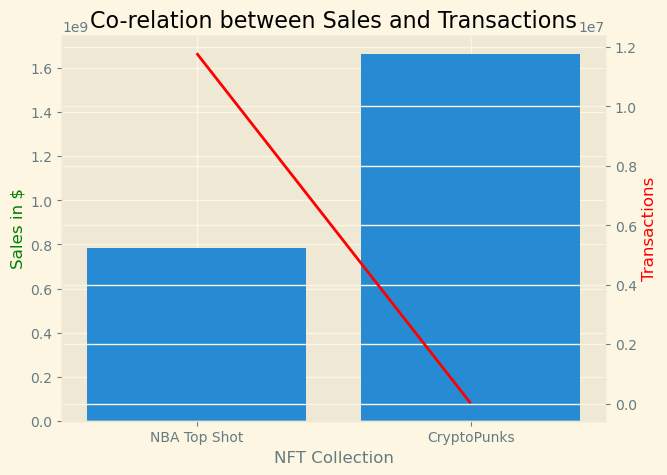

In [23]:
#Visualization 
collections = [collection_of_most,collection_of_lower]
sales = [sales_of_most,sales_of_lower]
transactions = [most_transaction,lower_transact]

plt.style.use('Solarize_Light2')
fig,ax1 = plt.subplots(figsize=(7,5))
ax2=ax1.twinx()
p = ax1.bar(collections,sales)
ax2.plot(collections,transactions,'r-')
plt.title('Co-relation between Sales and Transactions')
ax1.set_xlabel('NFT Collection')
ax1.set_ylabel('Sales in $',color='g')
ax2.set_ylabel('Transactions',color='r')
plt.show()

In [ ]:
#The above graph shows that more number of transactions does not neccessary lead to more number of sales